In [1]:
import numpy as nu
import matplotlib.pyplot as plt
from galpy.potential import SCFPotential, HernquistPotential, NFWPotential, scf_compute_coeffs_spherical,scf_compute_coeffs_axi, scf_compute_coeffs
from galpy.potential import FlattenedPowerPotential
from IPython.display import display, Math, Latex
from galpy.util.bovy_coords import cyl_to_spher, spher_to_cyl
%matplotlib inline  


In [2]:
h = HernquistPotential(amp=1, a=1)
nfw = NFWPotential(amp=1)

def rho_Spherical(R, z=0, phi=0.):
    return h.dens(R,z)

def rho_NFW(R, z=0, phi=0):
    return nfw.dens(R, z)

In [3]:
Acos, Asin = scf_compute_coeffs_spherical(rho_Spherical,2, 1.)
scf = SCFPotential(Acos=Acos,Asin=Asin)

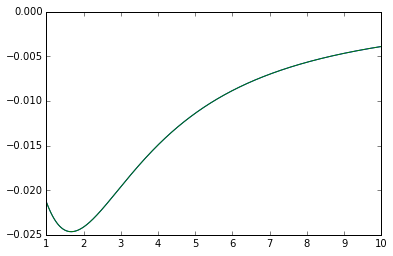

In [4]:
R = nu.linspace(1.,10,1000)
plt.plot(R, scf.Rforce(R,2,1))
plt.plot(R, h.Rforce(R, 2, 1))

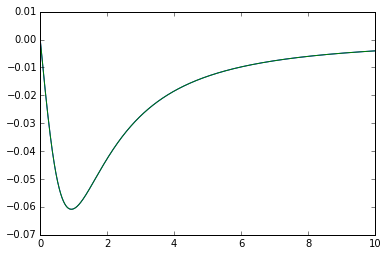

In [5]:
z = nu.linspace(0.,10,1000)
plt.plot(z, scf.zforce(1,z,1))
plt.plot(z, h.zforce(1, z, 1))

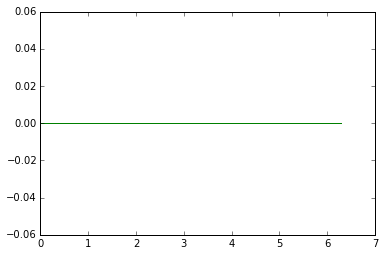

In [6]:
phi = nu.linspace(0, 2*nu.pi,1000)
plt.plot(phi, scf.phiforce(2.,1.,phi))
plt.plot(phi, h.phiforce(2., 1., phi)*nu.ones((1000))) ## h._phiforce(2., 1., phi) returns a float even though phi is an array

In [7]:
from galpy.orbit import Orbit
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])

<IPython.core.display.Math object>

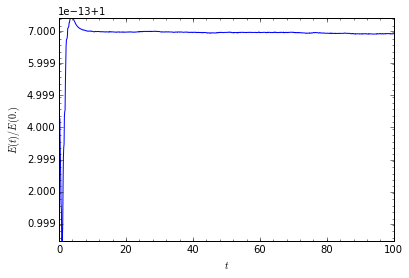

In [8]:
ts= nu.linspace(0,100,1000)

o.integrate(ts,scf,method='dopr54_c')
o.plotE(normed=True)

tEs = o.E(ts)
Eerr = (nu.std(tEs)/nu.mean(tEs))**2
display(Math(r'\left(\frac{\sigma_E}{\bar{E}} \right)^2 =' + str(Eerr)))

In [9]:
a_nfw = 20
N = 20
Acos, Asin = scf_compute_coeffs_spherical(rho_NFW,N, a_nfw)
scf = SCFPotential(Acos=Acos,Asin=Asin, a=a_nfw)


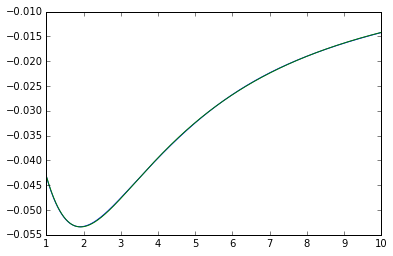

In [10]:
plt.plot(R, scf.Rforce(R,2,1))
plt.plot(R, nfw.Rforce(R, 2, 1))

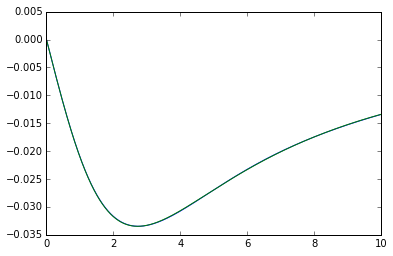

In [11]:
plt.plot(z, scf.zforce(3,z,1))
plt.plot(z, nfw.zforce(3, z, 1))

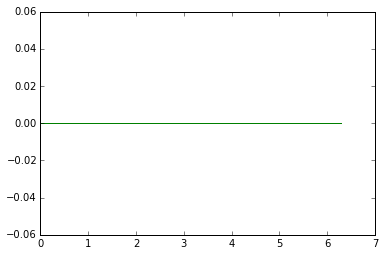

In [12]:
plt.plot(phi, scf.phiforce(2,2,phi))
plt.plot(phi, nfw.phiforce(2, 2, phi)*nu.ones((1000)))

<IPython.core.display.Math object>

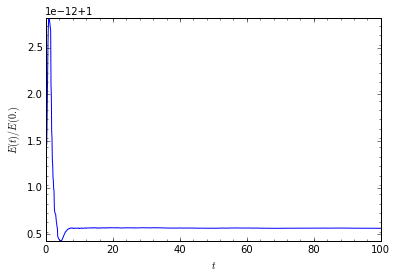

In [13]:
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])
o.integrate(ts,scf,method='dopr54_c')
o.plotE(normed=True)

tEs = o.E(ts)
Eerr = (nu.std(tEs)/nu.mean(tEs))**2
display(Math(r'\left(\frac{\sigma_E}{\bar{E}} \right)^2 =' + str(Eerr)))

In [14]:
fp = FlattenedPowerPotential()

In [15]:
Acos1, Asin1 = scf_compute_coeffs_axi(fp.dens,10,10,a=.1)
Acos2, Asin2 = scf_compute_coeffs_axi(fp.dens,10,10, a=1)
Acos3, Asin3 = scf_compute_coeffs_axi(fp.dens,10,10, a=10.)
scf1 = SCFPotential(Acos=Acos1,Asin=Asin1, a=.1)
scf2 = SCFPotential(Acos=Acos2,Asin=Asin2, a=1.)
scf3 = SCFPotential(Acos=Acos3,Asin=Asin3, a=10.)

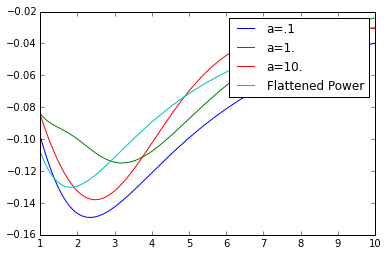

In [16]:
plt.plot(R, scf1.Rforce(R,2,1), label="a=.1")
plt.plot(R, scf2.Rforce(R,2,1), label="a=1.")
plt.plot(R, scf3.Rforce(R,2,1), label="a=10.")
plt.plot(R, fp.Rforce(R, 2, 1), label="Flattened Power")
plt.legend()

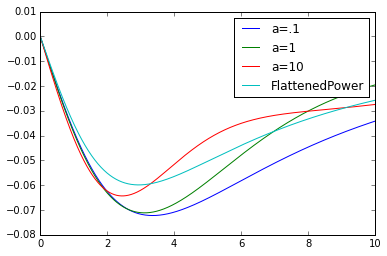

In [17]:
plt.plot(z, scf1.zforce(4,z,1),label="a=.1")
plt.plot(z, scf2.zforce(4,z,1),label="a=1")
plt.plot(z, scf3.zforce(4,z,1),label="a=10")
plt.plot(z, fp.zforce(4, z, 1), label="FlattenedPower")
plt.legend()

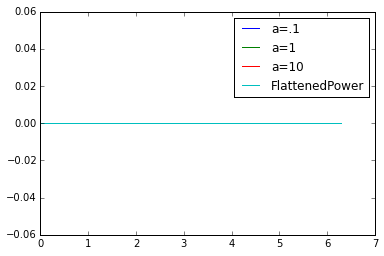

In [18]:
plt.plot(phi, scf1.phiforce(1,2,phi), label="a=.1")
plt.plot(phi, scf2.phiforce(1,2,phi), label="a=1")
plt.plot(phi, scf3.phiforce(1,2,phi), label="a=10")
plt.plot(phi, fp.phiforce(1, 2, phi)*nu.ones((1000)), label="FlattenedPower")
plt.legend()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

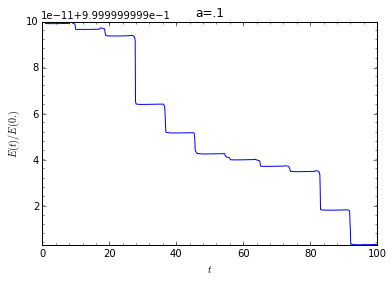

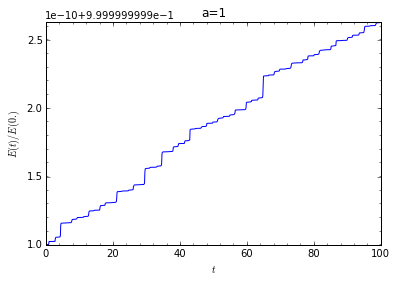

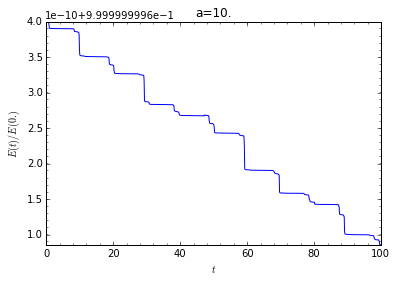

In [19]:
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])

o.integrate(ts,scf1,method='dopr54_c')
o.plotE(normed=True)
plt.title("a=.1")
tEs = o.E(ts)
Eerr = (nu.std(tEs)/nu.mean(tEs))**2
display(Math(r'\left(\frac{\sigma_E}{\bar{E}} \right)^2 =' + str(Eerr)))


o.integrate(ts,scf2,method='dopr54_c')
o.plotE(normed=True)
plt.title("a=1")
tEs = o.E(ts)
Eerr = (nu.std(tEs)/nu.mean(tEs))**2
display(Math(r'\left(\frac{\sigma_E}{\bar{E}} \right)^2 =' + str(Eerr)))

o.integrate(ts,scf3,method='dopr54_c')
o.plotE(normed=True)
plt.title("a=10.")
tEs = o.E(ts)
Eerr = (nu.std(tEs)/nu.mean(tEs))**2
display(Math(r'\left(\frac{\sigma_E}{\bar{E}} \right)^2 =' + str(Eerr)))

In [20]:
def density1(R, z=0, phi=0.):
    spherical_coords = cyl_to_spher(R,z, phi)
    r, theta, phi = spherical_coords
    h = HernquistPotential()
    return h.dens(R, z, phi)*(1 + eps*nu.cos(theta) + eps*nu.cos(theta)**2.)*(1 + eps*nu.cos(phi) + eps*nu.sin(phi))

In [46]:
eps = 1.
Acos, Asin = scf_compute_coeffs(density1,5, 5, phi_order=20)
scf = SCFPotential(Acos=Acos,Asin=Asin)

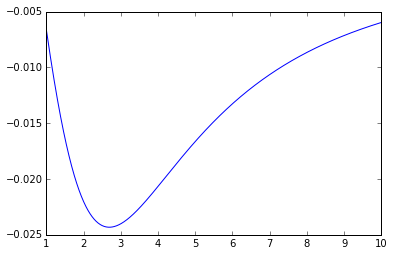

In [47]:
plt.plot(R, scf.Rforce(R,3,0))

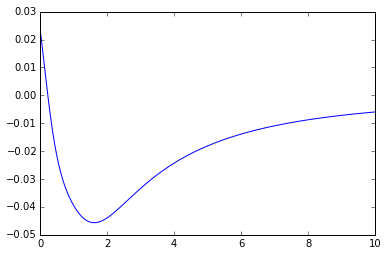

In [48]:
plt.plot(z, scf.zforce(1,z,nu.pi))

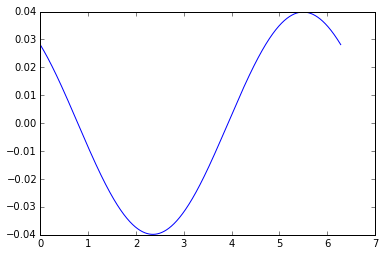

In [49]:
plt.plot(phi, scf.phiforce(1,2, phi))

<IPython.core.display.Math object>

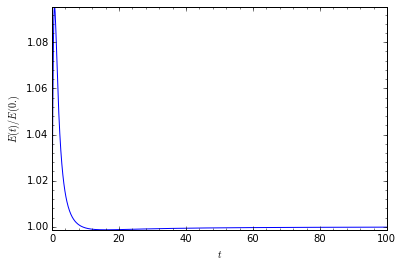

In [52]:
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1])
o.integrate(ts,scf,method='dopr54_c')
o.plotE(normed=True)

tEs = o.E(ts)
Eerr = (nu.std(tEs)/nu.mean(tEs))**2
display(Math(r'\left(\frac{\sigma_E}{\bar{E}} \right)^2 =' + str(Eerr)))